# I-Business Understanding :

1-Objective:

The main objective of an Intrusion Detection System (IDS) is to protect the network from malicious events. Given the increasing variety of cyber attacks, traditional firewalls may not suffice to safeguard the network. Hence, an IDS is crucial to preventing novel attacks that can make the system more vulnerable.

2-Business Problem:

The challenge lies in :

-Detecting and preventing both known and unknown malicious activities.
-Enhancing the network's security posture.

3-Data Mining Goals:

- Develop predictive models to identify signatures or specific patterns indicative of known attacks (Signature-based IDS).
- Implement machine learning techniques for anomaly-based IDS, capable of recognizing unknown attacks by comparing current real-time traffic to previously recorded malicious-free traffic.

4-Success Criteria:

Evaluate intrusion detection models based on accuracy, precision, recall, F-score, and overall model accuracy.

5-Identify business :

-Affordable to deploy and maintain.
-Easy to integrate with existing network infrastructure.
-Compliant with data privacy regulations.


6-Data requirements:

-Labeled with attack types.
-Preprocessed to remove noise and irrelevant features.
-Representative of real-world network traffic patterns.


7-Assess business risks:

-Fail to detect all network attacks.
-Generate too many false positives.
-Be vulnerable to attacks itself.

8-Types of IDS:

- Signature-based IDS:
 -Identifies known attack signatures or specific patterns.
 -Effective for known attacks with minimal false alarms.


-  Anomaly-based IDS:
Uses machine learning to analyze real-time traffic against recorded malicious-free traffic.
Effective for recognizing unknown attacks but may have higher false negatives.
Widely used due to its capability to handle novel threats.


Key Deliverables:

At the end of the project, our primary goal is to provide robust intrusion detection systems (IDS) that have been developed and evaluated with the aim of enhancing the security of computer networks. The focus is on effectively identifying and classifying various types of network attacks to mitigate potential risks and safeguard against malicious activities.


---



# II-Data Understanding :

To do the Data Understanding we first need to import the dataset and add the features to each column

In [ ]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate','xAttack','DifficultyLevel']

We will create a dictionary for each group of attack having a unique key which is the main attack class

In [ ]:
attack_classes = {
    'normal': 'normal',
    'dos': 'neptune, back, land, pod, smurf, teardrop, mailbomb, apache2, processtable, udpstorm, worm',
    'u2r': 'buffer_overflow, loadmodule, perl, rootkit, ps, sqlattack, xterm',
    'r2l': 'ftp_write, guess_passwd, imap, multihop, phf, spy, warezclient, warezmaster, sendmail, named, snmpgetattack, snmpguess, xlock, xsnoop, httptunnel',
    'probe': 'ipsweep, nmap, portsweep, satan, mscan, saint'
}

attack_classes = {key: value.strip().split(', ') for key, value in attack_classes.items()}
attacks_types = {attack: attack_type for attack_type, attacks in attack_classes.items() for attack in attacks}

We will now import our training data and our testing data and then we will create a new column called Attack Type containing the main class associated to each sub attack




In [ ]:
Data=pd.read_csv('KDDTrain+.csv',names = columns)
test=pd.read_csv('KDDTest+.csv',names = columns)
unique_values = Data['xAttack'].unique()
test.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,DifficultyLevel
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
Data['Attack Type'] = Data.xAttack.apply(lambda r: attacks_types[r.strip().lower()])
test['Attack Type'] = test.xAttack.apply(lambda r: attacks_types[r.strip().lower()])

In [ ]:
Data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,DifficultyLevel,Attack Type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal




> **We now can see that our dataset contains 125973 lines , with 4 (5 with the attack type) categorical variables and 39 numerical features ( 15 of float type and 24 of integer type)**



In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 



 > **We provide here a summary of the dataset for each numerical column showing the amount of non null variable , the average mean of each one , the standard deviation , the min and max and finally the 3 quartiles of each columns**






In [ ]:
Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,DifficultyLevel
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000




> **We can see here that our dataset doesn't contain empty rows or columns**



In [ ]:
Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
# Finding categorical features
num_cols = Data._get_numeric_data().columns

cate_cols = list(set(Data.columns)-set(num_cols))
cate_cols.remove('xAttack')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'flag', 'service']

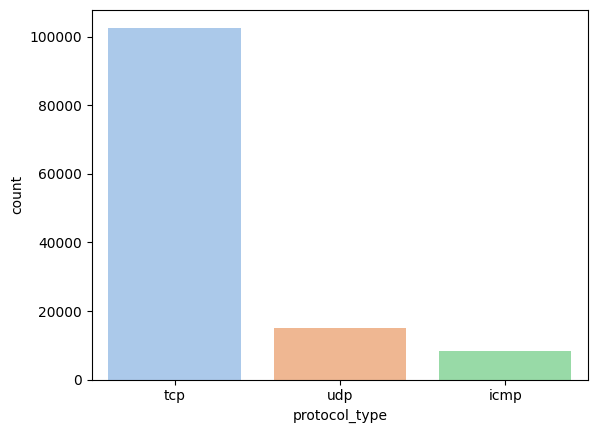

In [ ]:
sns.countplot(x="protocol_type",data=Data,palette="pastel")
plt.show()

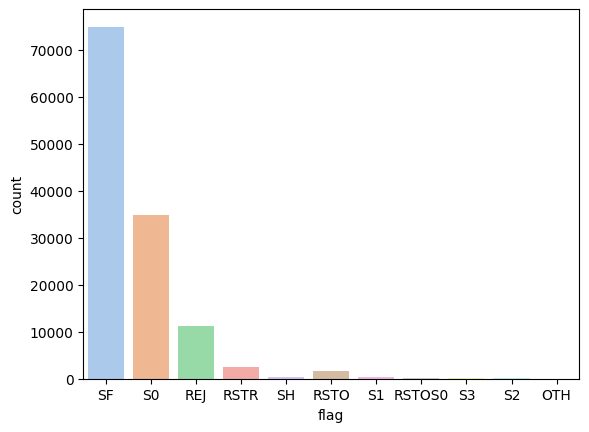

In [ ]:
sns.countplot(x="flag",data=Data,palette="pastel")
plt.show()

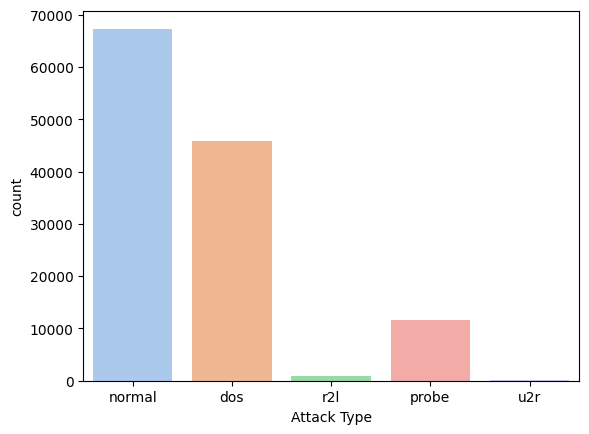

In [ ]:
sns.countplot(x="Attack Type",data=Data,palette="pastel")
plt.show()

We will now see a heatmap that will show us the correlation between each feature , the darker the color the less correlated it is , the whiter it is the more correlated it is.

<ipython-input-63-b6d2e19d5414>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Data.corr()


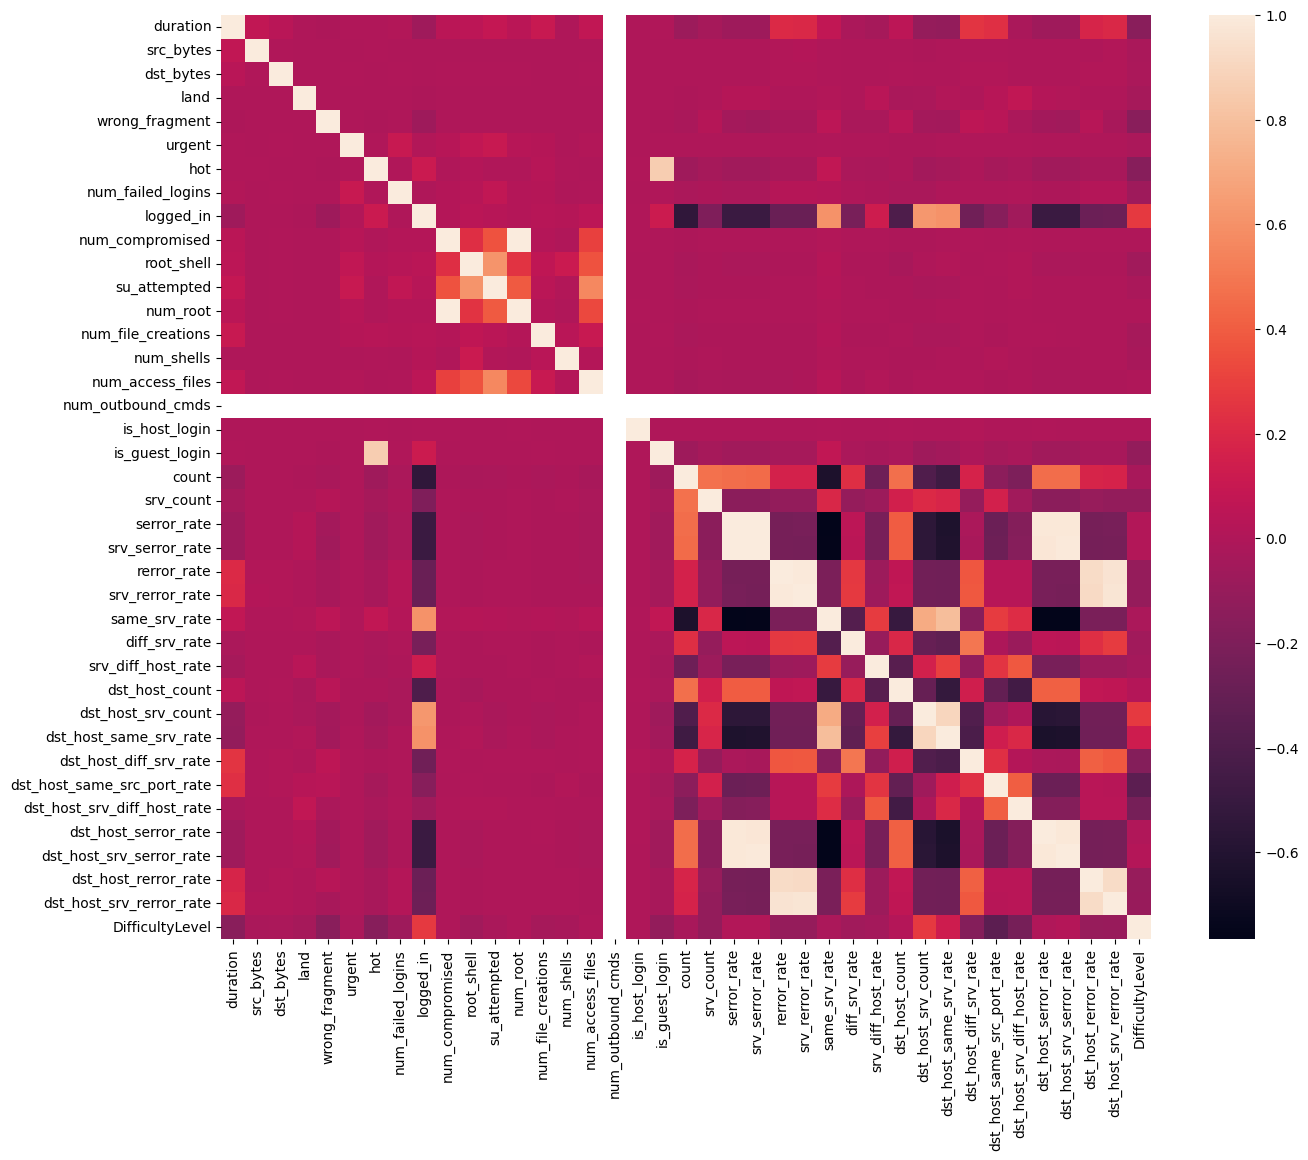

In [ ]:




corr = Data.corr()

plt.figure(figsize =(15, 12))

sns.heatmap(corr)

plt.show()

# **III-DATA PRE-PROCESSING**

In [ ]:
X_oh=Data.drop(['service','flag'],axis=1)
X_oh.values.reshape(1, -1)

test_oh=test.drop(['service','flag'],axis=1)
test_oh.values.reshape(1,-1)

array([[0, 'tcp', 0, ..., 'mscan', 14, 'probe']], dtype=object)

Now we do the OneHotEnconding for the categorical features

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder



# Assuming 'protocol_type' is a column in your DataFrame
protocol_type = X_oh['protocol_type']
protocol_type_test=test_oh['protocol_type']
# Use LabelEncoder to convert categorical values to numerical labels
label_encoder = LabelEncoder()
encoded_protocol_type = label_encoder.fit_transform(protocol_type)
encoded_test=label_encoder.fit_transform(protocol_type_test)
# Reshape the data to make it 2D
reshaped_protocol_type = encoded_protocol_type.reshape(-1, 1)
reshaped_encoded_test = encoded_test.reshape(-1,1)
# OneHotEncoder
OH = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_X = pd.DataFrame(OH.fit_transform(reshaped_protocol_type), columns=[f'protocol_type_{label}' for label in label_encoder.classes_])
OH_test=pd.DataFrame(OH.fit_transform(reshaped_encoded_test),columns=[f'protocol_type_{label}' for label in label_encoder.classes_])
# Assign the index from the original DataFrame
OH_X.index = X_oh.index
OH_test.index=test_oh.index

# Drop the 'protocol_type' column from the original DataFrame
num_X = X_oh.drop(['protocol_type'], axis=1)
num_test=test_oh.drop(['protocol_type'],axis=1)
# Concatenate the one-hot encoded DataFrame with the remaining numerical features
OH_X = pd.concat([OH_X, num_X], axis=1)
OH_test=pd.concat([OH_test,num_test],axis=1)

OH_X.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,DifficultyLevel,Attack Type
0,0.0,1.0,0.0,0,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0.0,0.0,1.0,0,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0.0,1.0,0.0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0.0,1.0,0.0,0,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0.0,1.0,0.0,0,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [ ]:
OH_X

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,DifficultyLevel,Attack Type
0,0.0,1.0,0.0,0,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0.0,0.0,1.0,0,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0.0,1.0,0.0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0.0,1.0,0.0,0,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0.0,1.0,0.0,0,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,1.0,0.0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,dos
125969,0.0,0.0,1.0,8,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,normal
125970,0.0,1.0,0.0,0,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,normal
125971,0.0,1.0,0.0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,dos


Now we do the Standardisation for the numerical features

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#OH_X is your one-hot encoded DataFrame
# Identify non-numeric columns
non_numeric_cols = OH_X.select_dtypes(exclude=['float64', 'int64']).columns
excluded_columns = ['DifficultyLevel']
columns_to_exclude = list(excluded_columns) + list(non_numeric_cols)
# Standardize the numeric data (important for PCA)
numeric_cols = OH_X.columns.difference(columns_to_exclude)
scaler = StandardScaler()
OH_X_standardized = pd.DataFrame(scaler.fit_transform(OH_X[numeric_cols]), columns=numeric_cols)
OH_test_standardized=pd.DataFrame(scaler.transform(OH_test[numeric_cols]),columns=numeric_cols)
OH_test_standardized.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,1.265346,-0.016930,-0.004919,0.734343,-0.121485,2.874410,-0.480197,-1.071933,-0.639532,-0.954389,...,-1.412415,-0.637209,-0.007762,-0.244204,-0.374560,2.715365,-0.631929,-0.024437,-0.007736,-0.089486
1,0.453177,-0.016930,-0.004919,0.734343,-0.121485,2.874410,-0.480197,-1.161030,-0.639532,-1.035688,...,-1.480656,-0.637209,-0.007762,-0.368110,-0.374560,2.715365,-0.631929,-0.024437,-0.007736,-0.089486
2,-0.725778,-0.349683,-0.004919,-0.485344,-0.227350,-0.387635,1.493939,0.197703,-0.639532,-0.267863,...,0.771283,-0.637209,-0.005551,-0.368110,-0.374560,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486
3,-0.725778,-0.349683,-0.004919,-1.805831,-0.439078,-0.387635,2.756092,1.066401,-0.639532,-0.529826,...,0.771283,-0.637209,-0.007759,0.513001,3.474118,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486
4,-0.725778,-0.349683,-0.004915,-1.543750,0.460769,2.319862,-0.383108,-0.470526,-0.639532,-0.267863,...,0.771283,-0.637209,-0.007762,-0.271739,2.511949,1.170466,-0.363485,-0.024437,-0.007736,-0.089486


# **IV. FEATURE SELECTION**

In [ ]:
Data_final = pd.concat([OH_X_standardized, OH_X[columns_to_exclude]], axis=1)
Test_final= pd.concat([OH_test_standardized,OH_test[columns_to_exclude]],axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train= Data_final.drop(columns=['xAttack','Attack Type'], axis=1)
y_train= Data_final['Attack Type']
X_test=Test_final.drop(columns=['xAttack','Attack Type'],axis=1)
y_test=Test_final['Attack Type']





> **For our feature selection we will choose the wrapper method as it yields better result most of the time therefor it is the most suitable choice.**


---



# Wrapper method


We will use the cross validation recursive feature selection

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer,f1_score



In [ ]:
min_features_to_select = 1
rf_classifier = RandomForestClassifier(n_estimators=20)  # You can adjust parameters as needed
cv = StratifiedKFold(5)
random_seed=2

rfecv = RFECV(
    estimator=rf_classifier,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,

)

rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 39


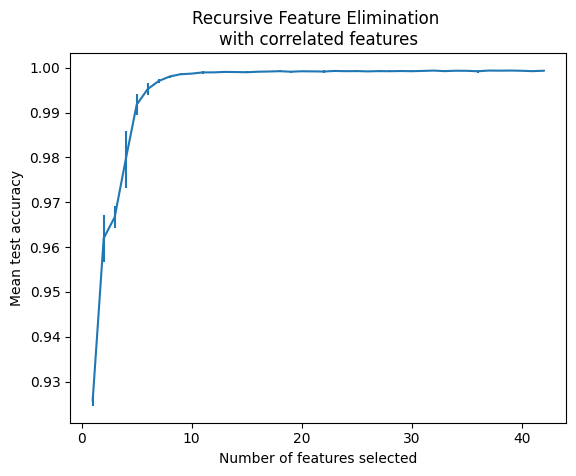

In [ ]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()


In [ ]:
# Get the indices of the top 25 features based on support


# Get the top 25 features based on ranking
top_30_features_indices = rfecv.ranking_.argsort()[:29]

# Get the names of the top 25 features
top_30_features_names = X_train.columns[top_30_features_indices]

# Print the names of the top 25 features
print(f"Names of the top 25 features: {top_30_features_names}")


Names of the top 25 features: Index(['count', 'num_file_creations', 'num_root', 'num_shells',
       'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
       'rerror_rate', 'num_failed_logins', 'root_shell', 'serror_rate',
       'src_bytes', 'srv_count', 'srv_diff_host_rate', 'srv_rerror_rate',
       'srv_serror_rate', 'urgent', 'same_srv_rate', 'wrong_fragment',
       'num_compromised', 'logged_in', 'diff_srv_rate', 'dst_bytes',
       'dst_host_count', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate'],
      dtype='object')


In [ ]:
selected_feature_names=rfecv.get_support
selected_feature_names

<bound method SelectorMixin.get_support of RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(n_estimators=20), n_jobs=2,
      scoring='accuracy')>

In [ ]:
X_train=X_train[top_30_features_names]
X_test=X_test[top_30_features_names]
X_train_wrapper, X_test_wrapper, y_train_wrapper, y_test_wrapper= train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_test.head()

,count,num_file_creations,num_root,num_shells,protocol_type_icmp,...,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate
0,1.265346,-0.02618,-0.012385,-0.01861,-0.265429,...,-0.121485,2.874410,-0.480197,-1.071933,-0.639532
1,0.453177,-0.02618,-0.012385,-0.01861,-0.265429,...,-0.121485,2.874410,-0.480197,-1.161030,-0.639532
2,-0.725778,-0.02618,-0.012385,-0.01861,-0.265429,...,-0.227350,-0.387635,1.493939,0.197703,-0.639532
3,-0.725778,-0.02618,-0.012385,-0.01861,3.767485,...,-0.439078,-0.387635,2.756092,1.066401,-0.639532
4,-0.725778,-0.02618,-0.012385,-0.01861,-0.265429,...,0.460769,2.319862,-0.383108,-0.470526,-0.639532


# **V-Modeling**

***KNN Classifier***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

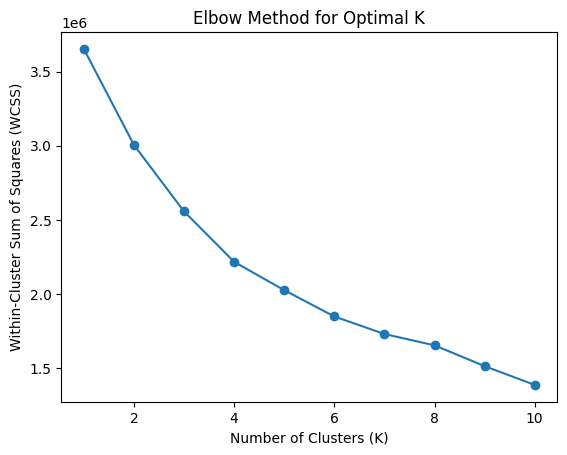

In [ ]:
#KNN
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# Calculate WCSS for different values of K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create a KNN classifier with a specified value of k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)





KNeighborsClassifier()

In [ ]:
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7379347054648687
              precision    recall  f1-score   support

         dos       0.95      0.75      0.84      7460
      normal       0.64      0.98      0.77      9711
       probe       0.87      0.61      0.72      2421
         r2l       0.81      0.02      0.04      2885
         u2r       0.62      0.07      0.13        67

    accuracy                           0.74     22544
   macro avg       0.78      0.49      0.50     22544
weighted avg       0.79      0.74      0.69     22544



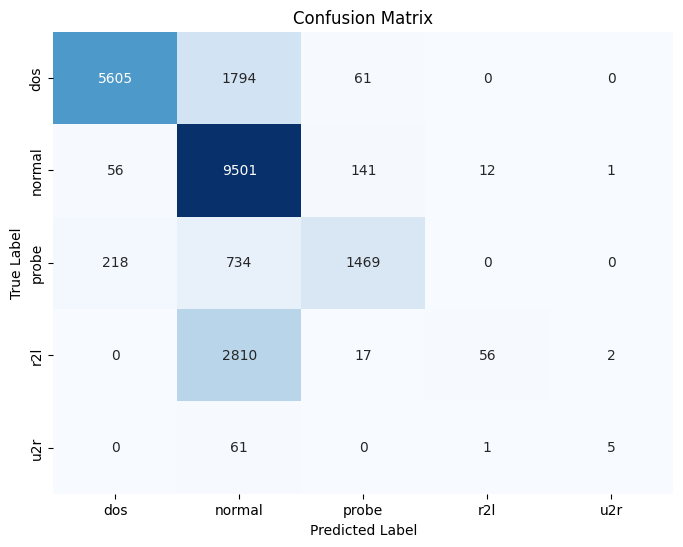

In [ ]:
cm=confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

***Decision tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


# Create a Decision tree classifier
model_DTC = DecisionTreeClassifier(criterion ="entropy")

# Fit the classifier to the training data
model_DTC.fit(X_train, y_train)





DecisionTreeClassifier(criterion='entropy')

In [ ]:
# Make predictions on the test data
DTC_pred = model_DTC.predict(X_test)

In [ ]:
print(accuracy_score(y_test, DTC_pred))
print(classification_report(y_test, DTC_pred))

0.7365152590489709
              precision    recall  f1-score   support

         dos       0.96      0.73      0.83      7460
      normal       0.64      0.97      0.77      9711
       probe       0.79      0.63      0.70      2421
         r2l       0.62      0.08      0.14      2885
         u2r       0.89      0.24      0.38        67

    accuracy                           0.74     22544
   macro avg       0.78      0.53      0.56     22544
weighted avg       0.76      0.74      0.70     22544



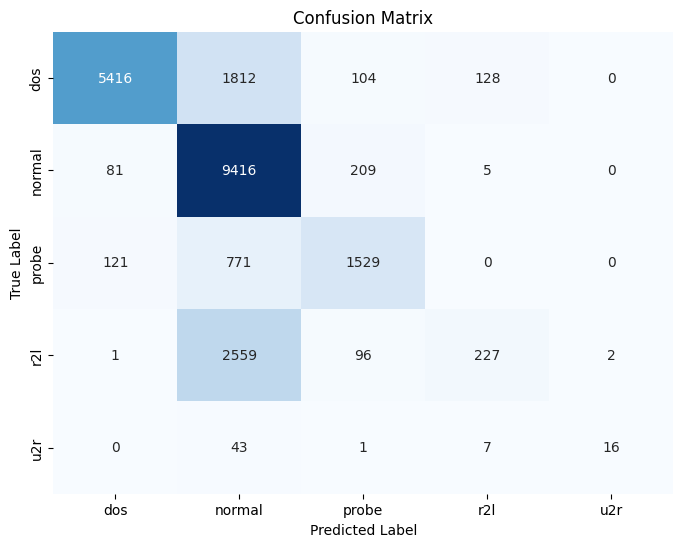

In [ ]:
cm_2=confusion_matrix(y_test, DTC_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_DTC.classes_, yticklabels=model_DTC.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

***SVM***

In [ ]:
from sklearn.svm import SVC
# Create an SVM classifier with the 'rbf' kernel
model_SVM = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can adjust the C and gamma parameters

# Fit the classifier to the training data
model_SVM.fit(X_train, y_train)

# Make predictions on the test set
y_pred_SVM = model_SVM.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_SVM))
print(classification_report(y_test, y_pred_SVM))

0.7325674237047551


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         dos       0.96      0.75      0.84      7460
      normal       0.64      0.98      0.77      9711
       probe       0.80      0.58      0.67      2421
         r2l       0.00      0.00      0.00      2885
         u2r       0.56      0.07      0.13        67

    accuracy                           0.73     22544
   macro avg       0.59      0.48      0.48     22544
weighted avg       0.68      0.73      0.68     22544



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


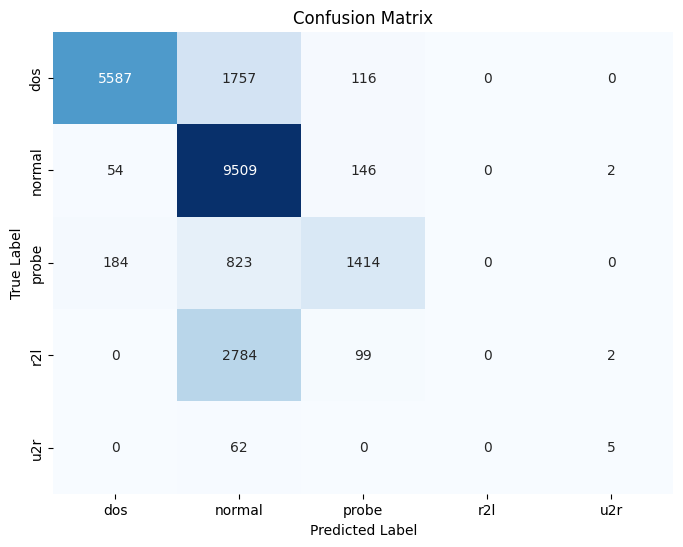

In [ ]:
cm_3=confusion_matrix(y_test, y_pred_SVM)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_SVM.classes_, yticklabels=model_SVM.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

***Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
model_RF = RandomForestClassifier(n_estimators=20, criterion='gini')  # You can adjust the number of estimators and other parameters

# Fit the classifier to the training data
model_RF.fit(X_train, y_train)
y_pred_RFC=model_RF.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_RFC))
print(classification_report(y_test, y_pred_RFC))

0.7418825408090844
              precision    recall  f1-score   support

         dos       0.96      0.78      0.86      7460
      normal       0.64      0.97      0.77      9711
       probe       0.86      0.61      0.71      2421
         r2l       0.57      0.00      0.00      2885
         u2r       0.60      0.04      0.08        67

    accuracy                           0.74     22544
   macro avg       0.73      0.48      0.49     22544
weighted avg       0.76      0.74      0.69     22544



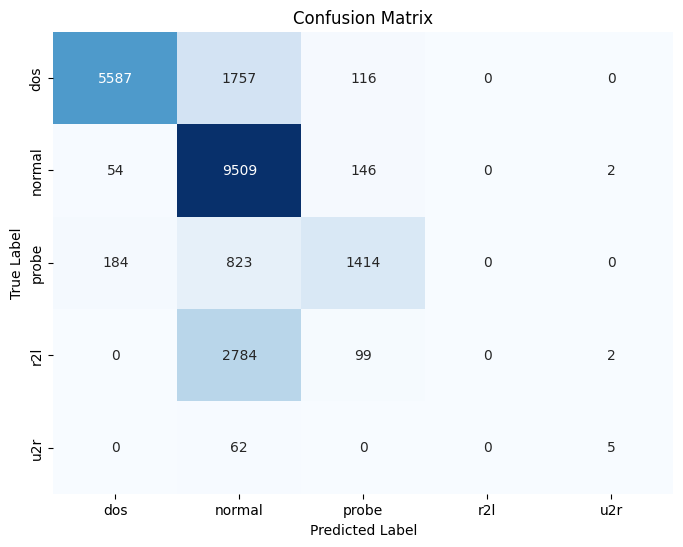

In [ ]:
cm_4=confusion_matrix(y_test, y_pred_RFC)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_RF.classes_, yticklabels=model_RF.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

***Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression classifier for multi-class classification
model_LR_multi = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr', max_iter=1000)

# Fit the classifier to the training data
model_LR_multi.fit(X_train, y_train)

# Make predictions on the test set
y_pred_multi = model_LR_multi.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_multi))
print(classification_report(y_test, y_pred_multi))

0.74361249112846
              precision    recall  f1-score   support

         dos       0.97      0.76      0.85      7460
      normal       0.64      0.97      0.77      9711
       probe       0.85      0.68      0.75      2421
         r2l       0.71      0.00      0.01      2885
         u2r       0.71      0.07      0.14        67

    accuracy                           0.74     22544
   macro avg       0.78      0.50      0.50     22544
weighted avg       0.78      0.74      0.70     22544



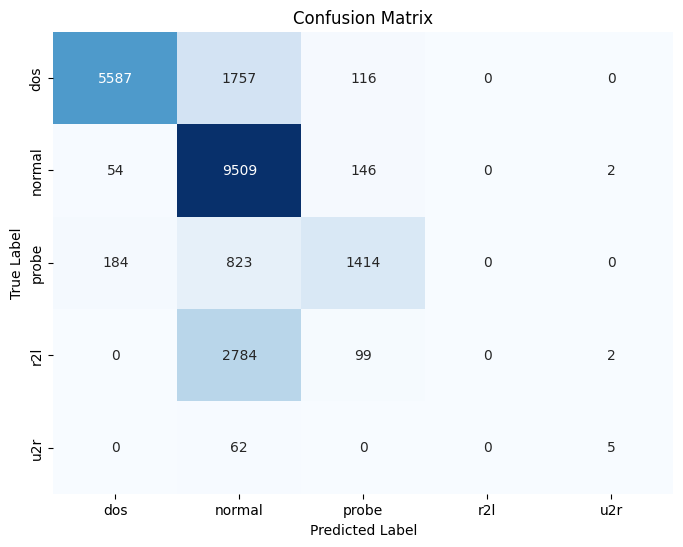

In [ ]:
cm_5=confusion_matrix(y_test, y_pred_multi)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_LR_multi.classes_, yticklabels=model_LR_multi.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

*Evaluation*

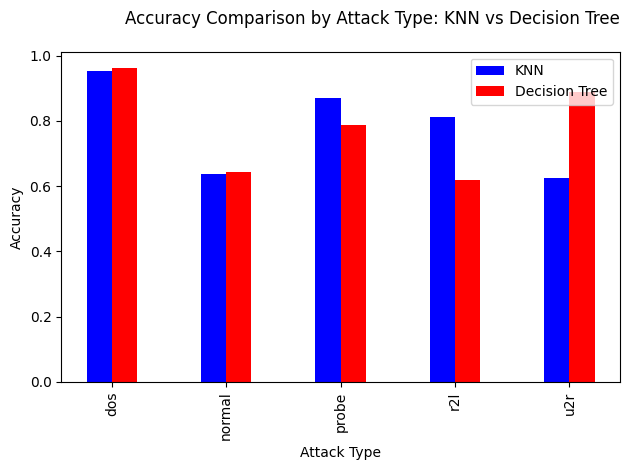

In [ ]:
# Assuming you have the classification reports from your models
knn_classification_report = classification_report(y_test, y_pred, output_dict=True)
dt_classification_report = classification_report(y_test, DTC_pred, output_dict=True)

# Extract precision, recall, and f1-score for each attack type
attack_types = list(knn_classification_report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

knn_accuracies = [knn_classification_report[attack_type]['precision'] for attack_type in attack_types]
dt_accuracies = [dt_classification_report[attack_type]['precision'] for attack_type in attack_types]

# Bar width
bar_width = 0.22

# Set up positions for bars
index = np.arange(len(attack_types))

# Create subplots with custom layout
fig, ax = plt.subplots()
ax.bar(index, knn_accuracies, width=bar_width, label='KNN', color='blue')
ax.bar(index + bar_width, dt_accuracies, width=bar_width, label='Decision Tree', color='red')

# Add labels and title
ax.set_xlabel('Attack Type')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison by Attack Type: KNN vs Decision Tree', loc='right', pad=20)  # loc='right' places the title on the right
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(attack_types, rotation='vertical')
ax.legend()



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

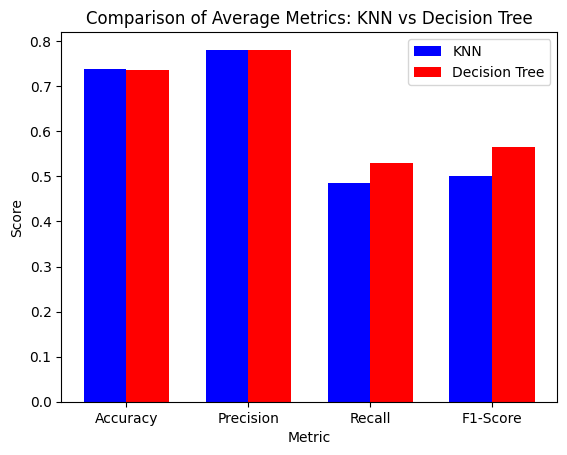

In [ ]:
# Extract overall metrics
knn_metrics = [knn_classification_report['accuracy'], knn_classification_report['macro avg']['precision'],
               knn_classification_report['macro avg']['recall'], knn_classification_report['macro avg']['f1-score']]

dt_metrics = [dt_classification_report['accuracy'], dt_classification_report['macro avg']['precision'],
              dt_classification_report['macro avg']['recall'], dt_classification_report['macro avg']['f1-score']]

# Metrics names
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Bar width
bar_width = 0.35

# Set up positions for bars
index = np.arange(len(metric_names))

# Create subplots with custom layout
fig, ax = plt.subplots()

# Create grouped bar plot
ax.bar(index - bar_width / 2, knn_metrics, width=bar_width, label='KNN', color='blue')
ax.bar(index + bar_width / 2, dt_metrics, width=bar_width, label='Decision Tree', color='red')

# Add labels and title
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Comparison of Average Metrics: KNN vs Decision Tree')
ax.set_xticks(index)
ax.set_xticklabels(metric_names)
ax.legend()

# Show the plot
plt.show()

In [ ]:
import joblib

joblib.dump(model_LR_multi, 'model_lr_multi.pkl')
joblib.dump(model_RF, 'model_RF.pkl')
joblib.dump(knn_classifier, 'knn_classifier.pkl')
joblib.dump(model_DTC, 'model_DTC.pkl')
joblib.dump(model_SVM, 'model_SVM.pkl')
# Save the fitted RFECV object to a file
joblib.dump(rfecv, 'rfecv_model.joblib')
joblib.dump(scaler,'scaler.joblib')


['scaler.joblib']

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   count                        125973 non-null  float64
 1   num_file_creations           125973 non-null  float64
 2   num_root                     125973 non-null  float64
 3   num_shells                   125973 non-null  float64
 4   protocol_type_icmp           125973 non-null  float64
 5   protocol_type_tcp            125973 non-null  float64
 6   protocol_type_udp            125973 non-null  float64
 7   rerror_rate                  125973 non-null  float64
 8   num_failed_logins            125973 non-null  float64
 9   root_shell                   125973 non-null  float64
 10  serror_rate                  125973 non-null  float64
 11  src_bytes                    125973 non-null  float64
 12  srv_count                    125973 non-null  float64
 13 

In [ ]:
import os

# Create the 'templates' folder
os.makedirs('/content/templates', exist_ok=True)

In [ ]:
!pip install flask-ngrok


In [ ]:
def one_hot_encoding(x):
  x=x.drop(['service','flag'],axis=1)
  x.values.reshape(1, -1)
  protocol_type_x=x['protocol_type']
  # Use LabelEncoder to convert categorical values to numerical labels
  label_encoder_x = LabelEncoder()
  x_protocol_type = label_encoder_x.fit_transform(protocol_type_x)
  # Reshape the data to make it 2D
  reshaped_x_protocol_type = x_protocol_type.reshape(-1, 1)
  # OneHotEncoder
  OH_pipe = OneHotEncoder(handle_unknown='ignore', sparse=False)
  OH_x = pd.DataFrame(OH_pipe.fit_transform(reshaped_x_protocol_type), columns=[f'protocol_type_{label}' for label in label_encoder_x.classes_])

  # Assign the index from the original DataFrame
  OH_x.index = x.index

  # # Drop the 'protocol_type' column from the original DataFrame
  num_x = x.drop(['protocol_type'], axis=1)

  # # Concatenate the one-hot encoded DataFrame with the remaining numerical features
  OH_x = pd.concat([OH_x, num_x], axis=1)

  return OH_x

In [ ]:
def standardize_data(x):
  #OH_X is your one-hot encoded DataFrame
# Identify non-numeric columns
  expected_columns = ['protocol_type_tcp', 'protocol_type_udp', 'protocol_type_icmp']

    # Ensure that all expected columns are present in the input data
  for col in expected_columns:
      if col not in x.columns:
            # If a column is missing, add it with a value of 0
          x[col] = 0

    # Reorder columns to match the expected order
  x = x[expected_columns + [col for col in x.columns if col not in expected_columns]]
  non_numeric_cols_x = x.select_dtypes(exclude=['float64', 'int64']).columns
  excluded_columns_x = ['DifficultyLevel']
  columns_to_exclude_x = list(excluded_columns_x) + list(non_numeric_cols_x)
  # Standardize the numeric data (important for PCA)
  numeric_cols_x = x.columns.difference(columns_to_exclude)
  x_norm = pd.DataFrame(scaler.transform(x[numeric_cols_x]), columns=numeric_cols_x)
  x_final = pd.concat([x_norm, x[columns_to_exclude_x]], axis=1)

  return x_final

In [ ]:
def feature_selection(x):
  expected_columns = ['protocol_type_tcp', 'protocol_type_udp', 'protocol_type_icmp']
    # Get the top 25 features based on ranking

    # Ensure that all expected columns are present in the input data
  for col in expected_columns:
      if col not in x.columns:
            # If a column is missing, add it with a value of 0
          x[col] = 0

    # Reorder columns to match the expected order
  x = x[expected_columns + [col for col in x.columns if col not in expected_columns]]
  return x[top_30_features_names]

In [ ]:
def convert_features(data, column_types):
    converted_features = []

    for value, column_type in zip(data, column_types):
        if column_type in ['int64', 'float64']:
            converted_features.append(float(value))
        else:
            converted_features.append(value)
    print(converted_features)
    return converted_features

In [ ]:
def assign_columns(x):
  Data=pd.read_csv('KDDTrain+.csv',names = columns)
  columns_name=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate','DifficultyLevel']
  data_withoutattack=Data[columns_name]
  column_types = data_withoutattack.dtypes.tolist()
  converted_features = convert_features(x, column_types)
  x_data=pd.DataFrame([converted_features], columns=columns_name)
  x_data.info()
  return x_data

In [ ]:
def order_columns(x):
  ordered_x=pd.read_csv('X_train.csv')
  order=ordered_x.columns.tolist()
  x=x[order]
  return x

In [ ]:
X_train.to_csv('X_train.csv', index=False)


In [ ]:
x=[0,'tcp','ftp_data','SF',491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20]
data=assign_columns(x)
data=one_hot_encoding(data)
print(data.head())
data=standardize_data(data)
data=feature_selection(data)
data=order_columns(data)
prediction = knn_classifier.predict(data)
print(prediction)

[0.0, 'tcp', 'ftp_data', 'SF', 491.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 150.0, 25.0, 0.17, 0.03, 0.17, 0.0, 0.0, 0.0, 0.05, 0.0, 20.0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     1 non-null      float64
 1   protocol_type                1 non-null      object 
 2   service                      1 non-null      object 
 3   flag                         1 non-null      object 
 4   src_bytes                    1 non-null      float64
 5   dst_bytes                    1 non-null      float64
 6   land                         1 non-null      float64
 7   wrong_fragment               1 non-null      float64
 8   urgent                       1 non-null      float64
 9   hot                      

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Import necessary libraries
from flask import Flask, render_template, request, jsonify
import traceback
from flask_ngrok import run_with_ngrok
from google.colab import output
output.serve_kernel_port_as_window(5000)
# Load your pre-trained models
model_knn = joblib.load('knn_classifier.pkl')
model_dtc = joblib.load('model_DTC.pkl')
model_svm = joblib.load('model_SVM.pkl')
model_rf = joblib.load('model_RF.pkl')
model_lr_multi = joblib.load('model_lr_multi.pkl')
# Create Flask app
app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when the app is run

app = Flask(__name__, template_folder='/content/templates')

# Define the main route
@app.route("/")
def index():
    return render_template("index.html")
@app.route('/predict', methods=['POST'])
def prediction():
    try:
            # Get data from the request
        entered_features_str = request.form.get('features')

        # Split the string into a list of values
        data = entered_features_str.split(',')
        # Assuming assign_columns function returns a DataFrame
        data = assign_columns(data)

        # Assuming one_hot_encoding function returns a DataFrame
        data = one_hot_encoding(data)
        # Assuming standardize_data function returns a DataFrame
        data = standardize_data(data)
        # Assuming feature_selection function returns a DataFrame
        data = feature_selection(data)

        data=order_columns(data)


        # Ensure that the columns of 'data' have the same names and order as X_train_wrapper
        # Assuming X_train_wrapper is a DataFrame representing your training data
        order = X_train.columns.tolist()
        print(order)
        print(data.columns.tolist())
        # Reorder the columns of 'data' to match the order used during training
        data_final = data[order]
        print(data_final)
        # Make predictions
        prediction_knn = knn_classifier.predict(data_final)
        prediction_dtc=model_DTC.predict(data_final)
        prediction_rf=model_RF.predict(data_final)
        prediction_SVM=model_SVM.predict(data_final)
        prediction_lr_multi=model_lr_multi.predict(data_final)
        results = {
    "KNN": prediction_knn.tolist(),
    "Decision Tree": prediction_dtc.tolist(),
    "Random Forest": prediction_rf.tolist(),
    "SVM": prediction_SVM.tolist(),
    "Logistic Regression": prediction_lr_multi.tolist(),
}
        print(prediction)
        # Return the predictions as JSON
        return render_template("result.html",results=results)
    except Exception as e:
          traceback.print_exc()  # Print the traceback for debugging
          return jsonify({'error': 'Internal Server Error'}), 500
# Run the app
if __name__ == "__main__":
    app.run()


<IPython.core.display.Javascript object>

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 311, in __get__
    obj = instance._get_current_object()
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 508, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.
INFO:werkzeug:127.0.0.1 - - [12/Dec/2023 12:33:25] 

[0.0, 'udp', 'other', 'SF', 146.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.08, 0.15, 0.0, 255.0, 1.0, 0.0, 0.6, 0.88, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     1 non-null      float64
 1   protocol_type                1 non-null      object 
 2   service                      1 non-null      object 
 3   flag                         1 non-null      object 
 4   src_bytes                    1 non-null      float64
 5   dst_bytes                    1 non-null      float64
 6   land                         1 non-null      float64
 7   wrong_fragment               1 non-null      float64
 8   urgent                       1 non-null      float64
 9   hot                          

INFO:werkzeug:127.0.0.1 - - [12/Dec/2023 12:34:14] "GET /favicon.ico HTTP/1.1" 404 -
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 311, in __get__
    obj = instance._get_current_object()
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 508, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy_repr.py", li

[0.0, 'tcp', 'private', 'S0', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 279.0, 7.0, 1.0, 1.0, 0.0, 0.0, 0.03, 0.06, 0.0, 255.0, 13.0, 0.05, 0.07, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 21.0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     1 non-null      float64
 1   protocol_type                1 non-null      object 
 2   service                      1 non-null      object 
 3   flag                         1 non-null      object 
 4   src_bytes                    1 non-null      float64
 5   dst_bytes                    1 non-null      float64
 6   land                         1 non-null      float64
 7   wrong_fragment               1 non-null      float64
 8   urgent                       1 non-null      float64
 9   hot                       

INFO:werkzeug:127.0.0.1 - - [12/Dec/2023 12:47:58] "GET /favicon.ico HTTP/1.1" 404 -
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 311, in __get__
    obj = instance._get_current_object()
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 508, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy_repr.py", li